In [3]:
####1. Importing Required Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\pabitra.guchhait\\GSK\\EDAcaseStudy\\CSV'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\pabitra.guchhait\GSK\EDAcaseStudy\CSV\application_data.csv
C:\Users\pabitra.guchhait\GSK\EDAcaseStudy\CSV\columns_description.csv
C:\Users\pabitra.guchhait\GSK\EDAcaseStudy\CSV\previous_application.csv


In [4]:
####1.1 Analysis on Application Data
#####1.1.1 Normal Routine Checks

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
application_data = pd.read_csv('C:\\Users\\pabitra.guchhait\\GSK\\EDAcaseStudy\\CSV\\application_data.csv')
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
application_data.shape

(307511, 122)

In [10]:
application_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [12]:
# Get the count,size and unique values in each column of application data
application_data.agg(['count','size','nunique'])

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
count        307511  307511              307511       307511        307511   
size         307511  307511              307511       307511        307511   
nunique      307511       2                   2            3             2   

         FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count             307511        307511            307511      307511   
size              307511        307511            307511      307511   
nunique                2            15              2548        5603   

         AMT_ANNUITY  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count         307499  ...            307511            307511   
size          307511  ...            307511            307511   
nunique        13672  ...                 2                 2   

         FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              307511            307511                      265992   
size               307511            307511                      307511   
nunique                 2                 2                           5   

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                       265992                      265992   
size                        307511                      307511   
nunique                          9                           9   

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                       265992                     265992   
size                        307511                     307511   
nunique                         24                         11   

         AMT_REQ_CREDIT_BUREAU_YEAR  
count                        265992  
size                         307511  
nunique                          25  

[3 rows x 122 columns]

In [13]:
defaulters=application_data[application_data.TARGET==1]
nondefaulters=application_data[application_data.TARGET==0]

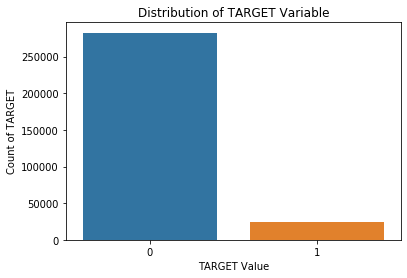

In [15]:
sns.countplot(application_data.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [17]:
percentage_defaulters=(len(defaulters)*100)/len(application_data)
percentage_nondefaulters=(len(nondefaulters)*100)/len(application_data)

print("The Percentage of people who have paid their loan is:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


In [19]:
###Identifying missing values in each column


In [21]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [23]:
#calculating meta-data for application_data
app_meta_data=meta_data(application_data)
app_meta_data.head(20)

Total    Percent  Unique Data_Type
COMMONAREA_MEDI           214865  69.872297    3202   float64
COMMONAREA_AVG            214865  69.872297    3181   float64
COMMONAREA_MODE           214865  69.872297    3128   float64
NONLIVINGAPARTMENTS_MODE  213514  69.432963     167   float64
NONLIVINGAPARTMENTS_AVG   213514  69.432963     386   float64
NONLIVINGAPARTMENTS_MEDI  213514  69.432963     214   float64
FONDKAPREMONT_MODE        210295  68.386172       4    object
LIVINGAPARTMENTS_MODE     210199  68.354953     736   float64
LIVINGAPARTMENTS_AVG      210199  68.354953    1868   float64
LIVINGAPARTMENTS_MEDI     210199  68.354953    1097   float64
FLOORSMIN_AVG             208642  67.848630     305   float64
FLOORSMIN_MODE            208642  67.848630      25   float64
FLOORSMIN_MEDI            208642  67.848630      47   float64
YEARS_BUILD_MEDI          204488  66.497784     151   float64
YEARS_BUILD_MODE          204488  66.497784     154   float64
YEARS_BUILD_AVG           204488  66.497784     149   float64
OWN_CAR_AGE               202929  65.990810      62   float64
LANDAREA_MEDI             182590  59.376738    3560   float64
LANDAREA_MODE             182590  59.376738    3563   float64
LANDAREA_AVG              182590  59.376738    3527   float64

In [24]:
###Dropping columns with High Missing Values

In [26]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
application_data=application_data[cols_to_keep]
application_data.describe()

EXT_SOURCE_1  NONLIVINGAREA_MODE  NONLIVINGAREA_AVG  \
count  134133.000000       137829.000000      137829.000000   
mean        0.502130            0.027022           0.028358   
std         0.211062            0.070254           0.069523   
min         0.014568            0.000000           0.000000   
25%         0.334007            0.000000           0.000000   
50%         0.505998            0.001100           0.003600   
75%         0.675053            0.023100           0.027700   
max         0.962693            1.000000           1.000000   

       NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  ELEVATORS_MODE  \
count       137829.000000   143620.000000  143620.000000   143620.000000   
mean             0.028236        0.078078       0.078942        0.074490   
std              0.070166        0.134467       0.134576        0.132256   
min              0.000000        0.000000       0.000000        0.000000   
25%              0.000000        0.000000       0.000000        0.000000   
50%              0.003100        0.000000       0.000000        0.000000   
75%              0.026600        0.120000       0.120000        0.120800   
max              1.000000        1.000000       1.000000        1.000000   

       APARTMENTS_MEDI  APARTMENTS_AVG  APARTMENTS_MODE  ...  \
count    151450.000000    151450.00000    151450.000000  ...   
mean          0.117850         0.11744         0.114231  ...   
std           0.109076         0.10824         0.107936  ...   
min           0.000000         0.00000         0.000000  ...   
25%           0.058300         0.05770         0.052500  ...   
50%           0.086400         0.08760         0.084000  ...   
75%           0.148900         0.14850         0.143900  ...   
max           1.000000         1.00000         1.000000  ...   

       FLAG_CONT_MOBILE  FLAG_WORK_PHONE  FLAG_EMP_PHONE     FLAG_MOBIL  \
count     307511.000000    307511.000000   307511.000000  307511.000000   
mean           0.998133         0.199368        0.819889       0.999997   
std            0.043164         0.399526        0.384280       0.001803   
min            0.000000         0.000000        0.000000       0.000000   
25%            1.000000         0.000000        1.000000       1.000000   
50%            1.000000         0.000000        1.000000       1.000000   
75%            1.000000         0.000000        1.000000       1.000000   
max            1.000000         1.000000        1.000000       1.000000   

       DAYS_ID_PUBLISH  DAYS_REGISTRATION  DAYS_EMPLOYED     DAYS_BIRTH  \
count    307511.000000      307511.000000  307511.000000  307511.000000   
mean      -2994.202373       -4986.120328   63815.045904  -16036.995067   
std        1509.450419        3522.886321  141275.766519    4363.988632   
min       -7197.000000      -24672.000000  -17912.000000  -25229.000000   
25%       -4299.000000       -7479.500000   -2760.000000  -19682.000000   
50%       -3254.000000       -4504.000000   -1213.000000  -15750.000000   
75%       -1720.000000       -2010.000000    -289.000000  -12413.000000   
max           0.000000           0.000000  365243.000000   -7489.000000   

       REGION_POPULATION_RELATIVE     SK_ID_CURR  
count               307511.000000  307511.000000  
mean                     0.020868  278180.518577  
std                      0.013831  102790.175348  
min                      0.000290  100002.000000  
25%                      0.010006  189145.500000  
50%                      0.018850  278202.000000  
75%                      0.028663  367142.500000  
max                      0.072508  456255.000000  

[8 rows x 84 columns]

In [28]:
####Checking columns with very less missing values


In [30]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(app_meta_data[(app_meta_data.Percent>0)&(app_meta_data.Percent<15)])
low_missing

Total    Percent  Unique Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR  41519  13.501631       5   float64
AMT_REQ_CREDIT_BUREAU_DAY   41519  13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_WEEK  41519  13.501631       9   float64
AMT_REQ_CREDIT_BUREAU_MON   41519  13.501631      24   float64
AMT_REQ_CREDIT_BUREAU_QRT   41519  13.501631      11   float64
AMT_REQ_CREDIT_BUREAU_YEAR  41519  13.501631      25   float64
NAME_TYPE_SUITE              1292   0.420148       7    object
OBS_30_CNT_SOCIAL_CIRCLE     1021   0.332021      33   float64
DEF_30_CNT_SOCIAL_CIRCLE     1021   0.332021      10   float64
OBS_60_CNT_SOCIAL_CIRCLE     1021   0.332021      33   float64
DEF_60_CNT_SOCIAL_CIRCLE     1021   0.332021       9   float64
EXT_SOURCE_2                  660   0.214626  119831   float64
AMT_GOODS_PRICE               278   0.090403    1002   float64
AMT_ANNUITY                    12   0.003902   13672   float64
CNT_FAM_MEMBERS                 2   0.000650      17   float64
DAYS_LAST_PHONE_CHANGE          1   0.000325    3773   float64

In [32]:
###Let's take look at all the columns names for different data types

In [34]:
application_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [36]:
application_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTA

In [38]:
application_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

In [39]:
application_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

In [40]:
#columns to convert
cols_to_convert=list(app_meta_data[(app_meta_data.Unique==2)&(app_meta_data.Data_Type=="int64")].index)

#function to conver columns
def convert_data(application_data, cols_to_convert):
    for y in cols_to_convert:
        application_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application_data

#calling the function for application_data
convert_data(application_data, cols_to_convert)
application_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
application_data.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

In [41]:
###Univariate Analyis on Categorical Columns

In [43]:
defaulters=application_data[application_data.TARGET==1]

nondefaulters=application_data[application_data.TARGET==0]

In [45]:
####Getting a list of columns with dtype=object, to identify columns for categorical analysis

In [47]:
application_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUS

In [48]:
## FUNCTION TO PLOT CHARTS

In [50]:
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

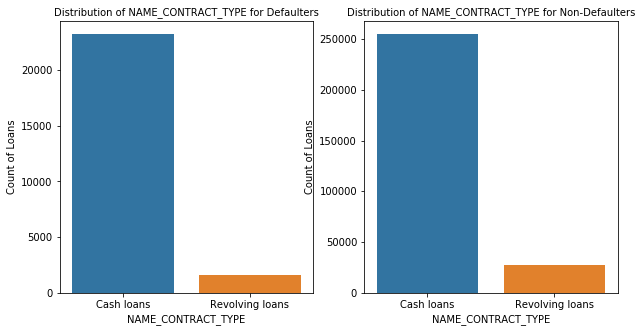

In [52]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

In [53]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

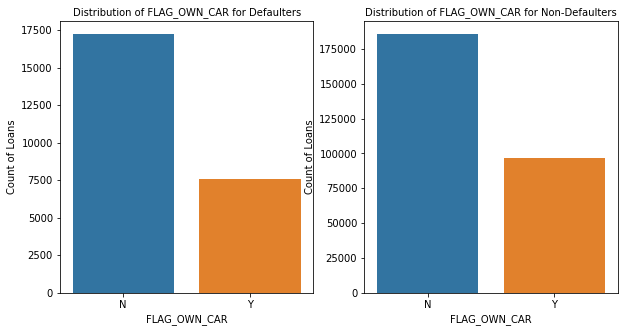

In [55]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

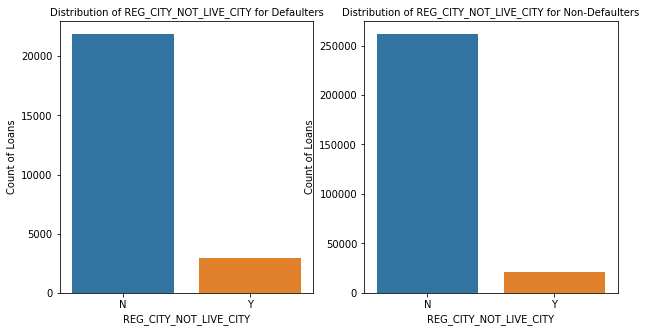

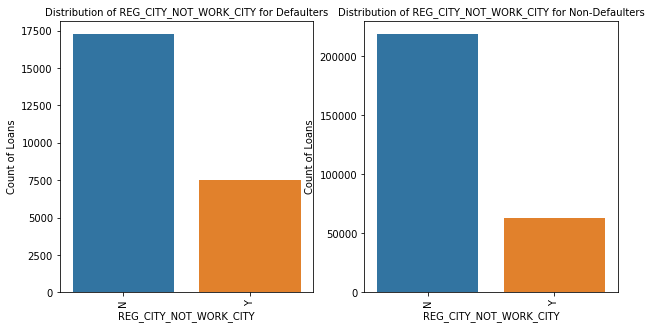

In [57]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

In [59]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

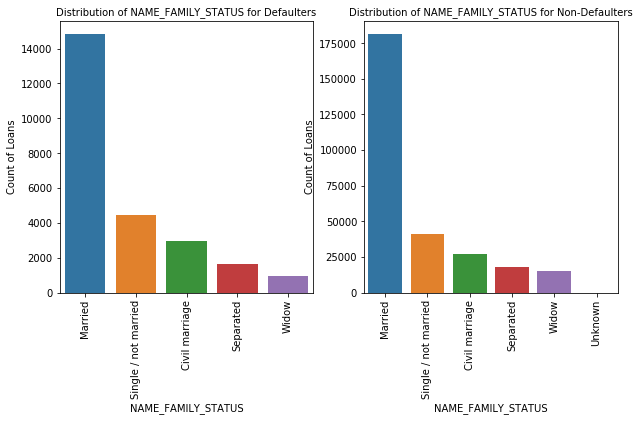

In [61]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

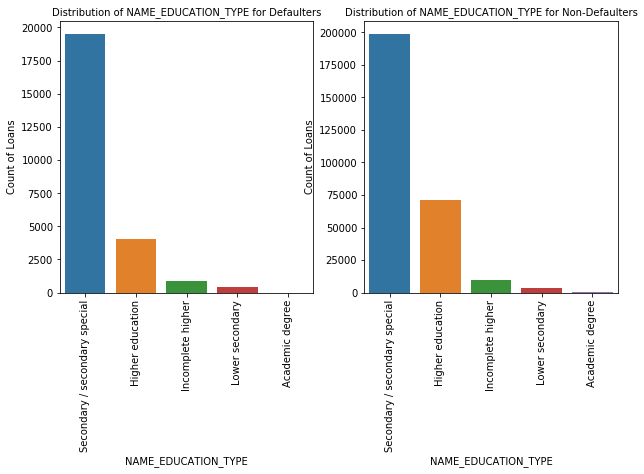

In [63]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

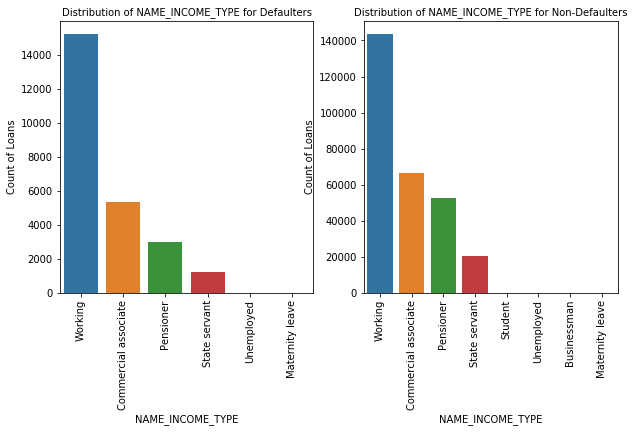

In [64]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

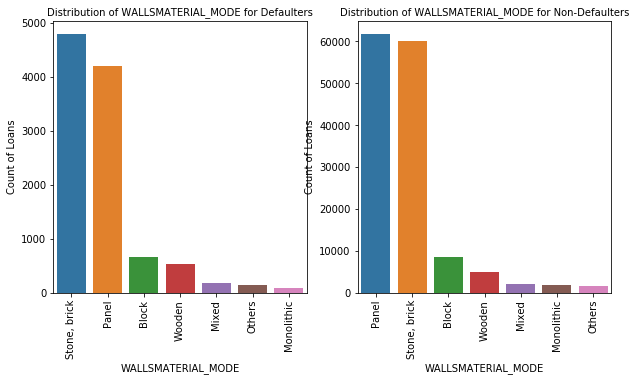

In [66]:
plot_charts('WALLSMATERIAL_MODE', label_rotation=True,horizontal_layout=True)

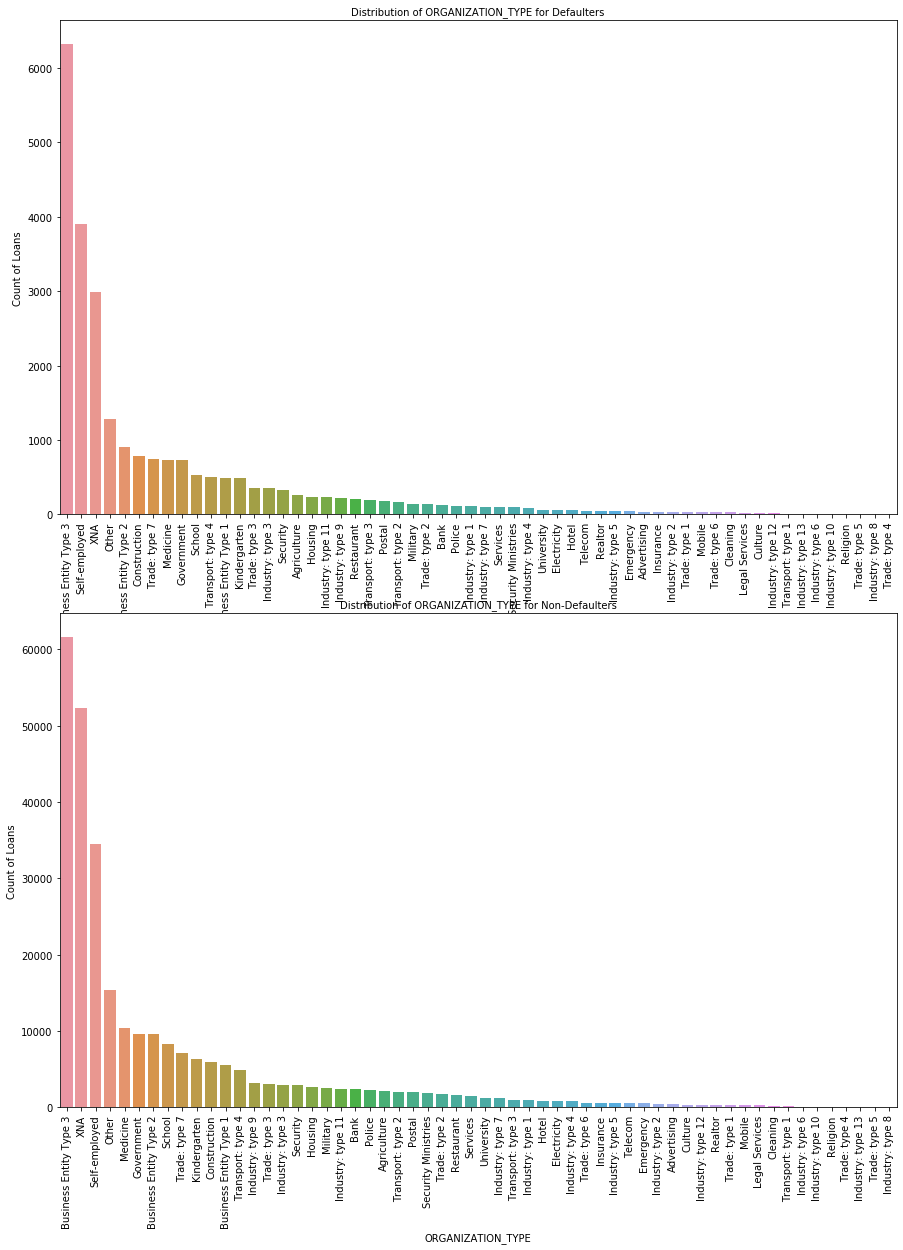

In [68]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

In [70]:
plot_charts('FLAG_WORK_PHONE', label_rotation=True,horizontal_layout=True)

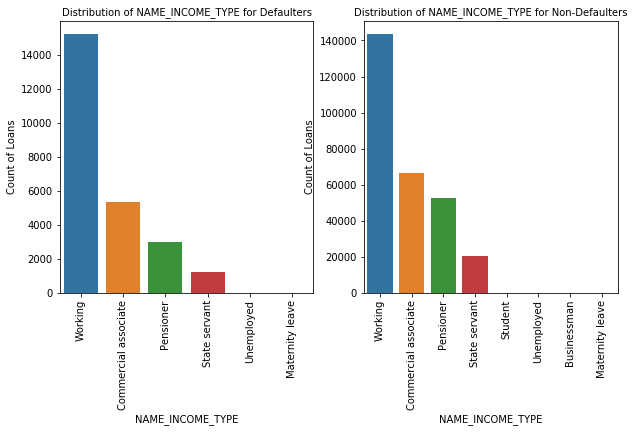

In [72]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

In [74]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

In [76]:
###Univariate & Bivariate Analyis on Numeric Columns
###Getting a list of columns with dtype=object, to identify columns for analysis

In [78]:
application_data.select_dtypes('float64').columns

Index(['EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTA

In [80]:
application_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

In [82]:
##Removing Outliers
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

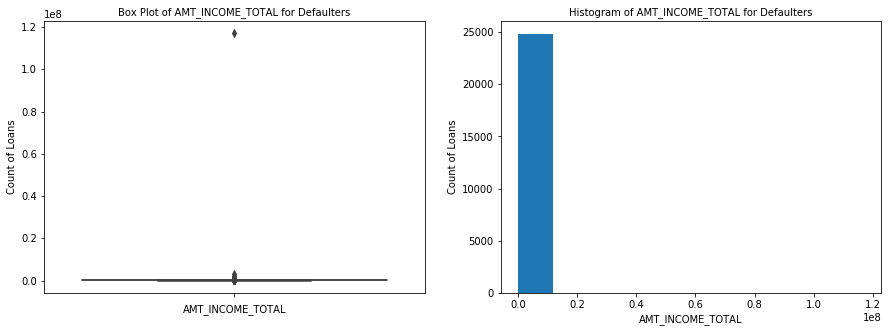

In [84]:
plot_boxhist('AMT_INCOME_TOTAL')

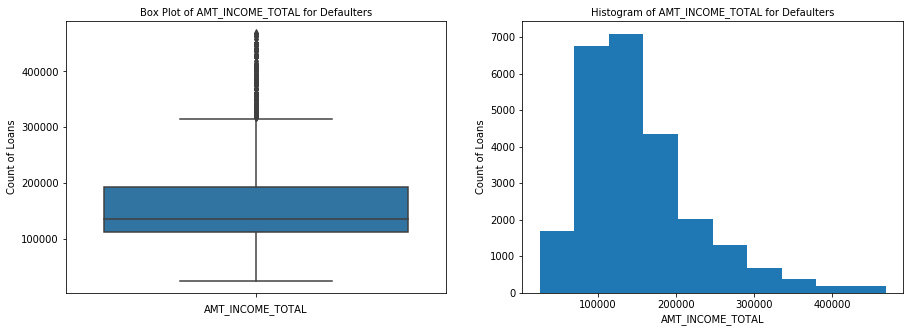

In [85]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

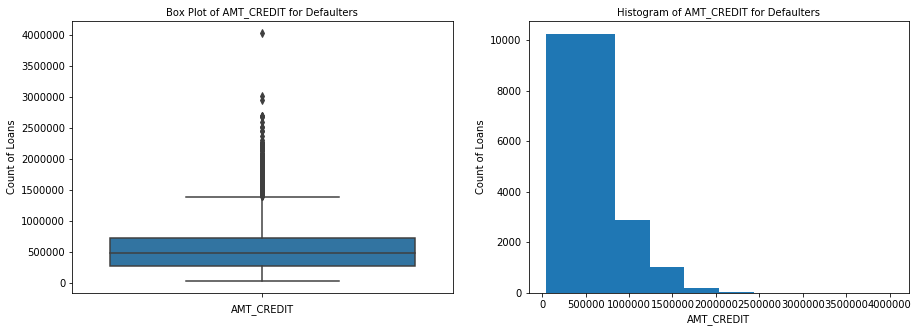

In [87]:
plot_boxhist('AMT_CREDIT')

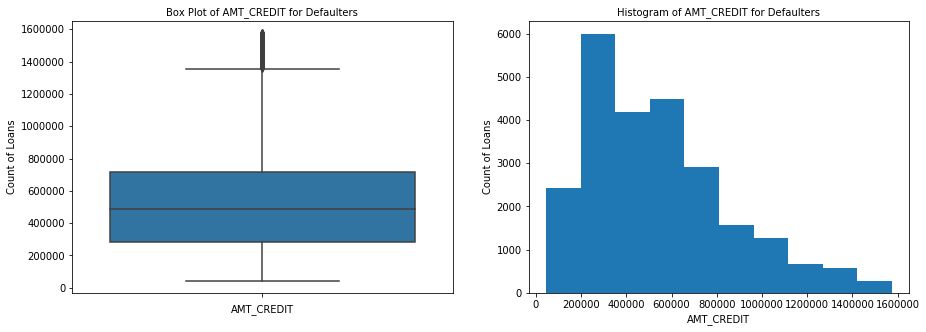

In [89]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_CREDIT<np.nanpercentile(application_data['AMT_CREDIT'], 99)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_CREDIT')

In [91]:
plot_boxhist('AMT_ANNUITY')

In [93]:
#Removing all entries above 99 percentile
application_data=application_data[application_data.AMT_ANNUITY<np.nanpercentile(application_data['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

plot_boxhist('AMT_ANNUITY')

In [95]:
#Deriving new metric Age from Days Birth
application_data['AGE'] = application_data['DAYS_BIRTH'] / -365
plt.hist(application_data['AGE']);
plt.title('Histogram of age in years.');

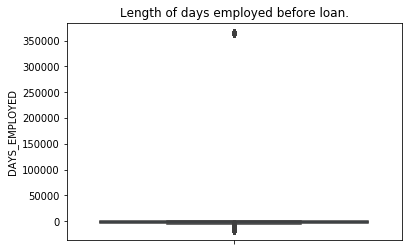

In [97]:
sns.boxplot(y=application_data['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');

In [99]:
application_data['DAYS_EMPLOYED'].describe()

count    240830.000000
mean      69491.053552
std      145758.141809
min      -17912.000000
25%       -2633.000000
50%       -1128.000000
75%        -236.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [101]:
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].replace(365243, np.nan)
application_data['DAYS_EMPLOYED'].describe()

count    193774.000000
mean      -2329.229830
std        2327.588268
min      -17912.000000
25%       -3089.000000
50%       -1585.000000
75%        -738.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [103]:
#Deriving variable "Years Employed" from days employed
application_data['YEARS_EMPLOYED'] = (application_data['DAYS_EMPLOYED']/-365)

#update dataframes
defaulters=application_data[application_data.TARGET==1] 
nondefaulters=application_data[application_data.TARGET==0]

C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


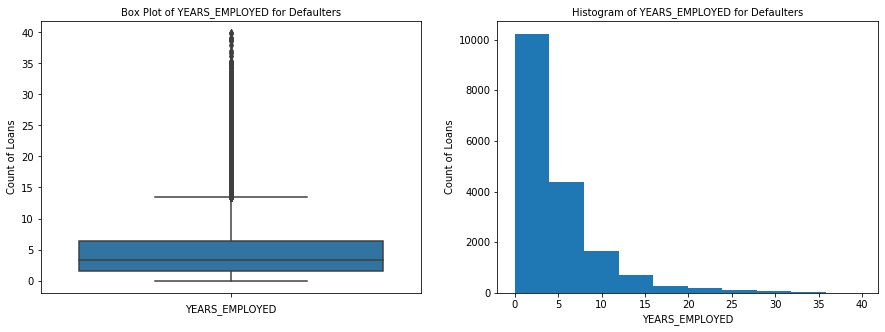

In [105]:
plot_boxhist('YEARS_EMPLOYED')

In [107]:
application_data.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})

YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                5.544292  4.838356       3   7.175342  52.487671
Commercial associate       5.646144  3.904110   50447  48.071233  39.093151
Maternity leave            6.260274  6.260274       2   8.273973  32.715068
Pensioner                 13.550137  7.673973      10  35.246575  60.608219
State servant              9.175420  6.884932   16098  48.172603  40.332877
Student                    7.065571  5.273973      15  21.931507  43.205479
Unemployed                      NaN       NaN       0        NaN  45.860274
Working                    6.318853  4.287671  127199  49.073973  39.457534

In [109]:
application_data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Commercial associate    214500.000000  191250.0   
                              Pensioner               156800.000000  123750.0   
                              State servant           226928.571429  198000.0   
                              Working                 195705.882353  166500.0   
Higher education              Businessman             195000.000000  180000.0   
                              Commercial associate    193178.976499  180000.0   
                              Maternity leave          90000.000000   90000.0   
                              Pensioner               144462.089603  135000.0   
                              State servant           176711.707295  157500.0   
                              Student                 164700.000000  171000.0   
                              Unemployed              187875.000000  180000.0   
                              Working                 167456.429532  157500.0   
Incomplete higher             Commercial associate    175678.553049  157500.0   
                              Pensioner               137748.348592  126000.0   
                              State servant           158098.285714  141750.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              157500.000000  157500.0   
                              Working                 154046.471419  135000.0   
Lower secondary               Commercial associate    152223.046512  135000.0   
                              Pensioner               101528.773109   90000.0   
                              State servant           133071.428571  112500.0   
                              Working                 131462.208528  117000.0   
Secondary / secondary special Commercial associate    161296.939426  148500.0   
                              Maternity leave          49500.000000   49500.0   
                              Pensioner               120813.729807  112500.0   
                              State servant           144472.097890  135000.0   
                              Student                 128500.000000  112500.0   
                              Unemployed               71055.000000   60750.0   
                              Working                 141161.715804  135000.0   

                                                                     
                                                    count       max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                       
Academic degree               Commercial associate     24  450000.0  
                              Pensioner                18  315000.0  
                              State servant            14  450000.0  
                              Working                  51  450000.0  
Higher education              Businessman               3  225000.0  
                              Commercial associate  15052  468000.0  
                              Maternity leave           1   90000.0  
                              Pensioner              6126  450000.0  
                              State servant          5986  450000.0  
                              Student                   5  225000.0  
                              Unemployed                4  337500.0  
                              Working               24507  455850.0  
Incomplete higher             Commercial associate   2460  468823.5  
                              Pensioner               426  450000.0  
                              State servant           588  450000.0  
                              Student                   1  157500.0  
                              Unemployed                2  270000.0  
                              Working                4461 

In [110]:
###Binning of Continuous Variables

In [112]:
application_data['AMT_INCOME_TOTAL'].describe()

count    240830.000000
mean     147974.337209
std       67765.433037
min       25650.000000
25%       99000.000000
50%      135000.000000
75%      180000.000000
max      468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [113]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


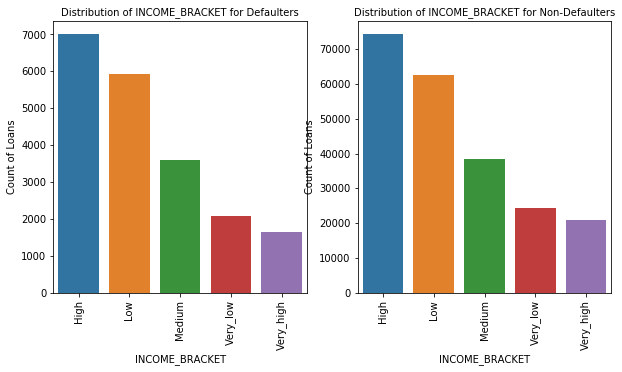

In [115]:
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

In [117]:
defaulters.loc[:,'Rating1']=pd.cut(application_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating1']=pd.cut(application_data.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [119]:
plot_charts('Rating1', label_rotation=True,horizontal_layout=True)


In [121]:
defaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating2']=pd.cut(application_data.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [124]:
plot_charts('Rating2', label_rotation=True,horizontal_layout=True)


In [126]:
defaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating3']=pd.cut(application_data.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

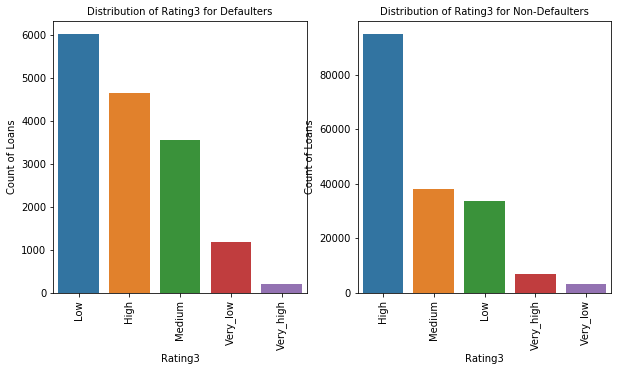

In [128]:
plot_charts('Rating3', label_rotation=True,horizontal_layout=True)


In [130]:
defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application_data.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])

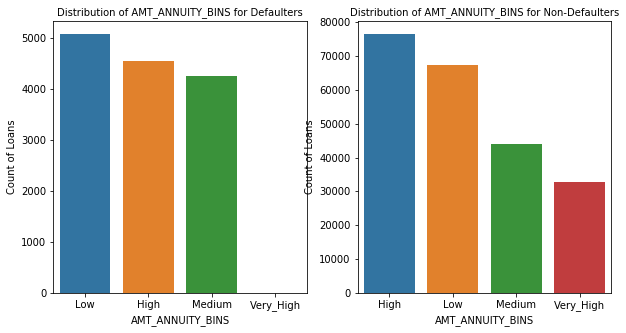

In [132]:
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

In [134]:
age_data = application_data.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = application_data.loc[:,'DAYS_BIRTH']/ -365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0        1       -9461    25.920548  (25.0, 30.0]
1        0      -16765    45.931507  (45.0, 50.0]
2        0      -19046    52.180822  (50.0, 55.0]
3        0      -19005    52.068493  (50.0, 55.0]
4        0      -19932    54.608219  (50.0, 55.0]
5        0      -16941    46.413699  (45.0, 50.0]
8        0      -20099    55.065753  (55.0, 60.0]
9        0      -14469    39.641096  (35.0, 40.0]
10       0      -10197    27.936986  (25.0, 30.0]
11       0      -20417    55.936986  (55.0, 60.0]

In [136]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123932  -8522.176886    23.348430
(25.0, 30.0]  0.115026 -10143.436913    27.790238
(30.0, 35.0]  0.107702 -11850.592995    32.467378
(35.0, 40.0]  0.093657 -13705.231565    37.548580
(40.0, 45.0]  0.083759 -15493.297874    42.447391
(45.0, 50.0]  0.078721 -17329.975817    47.479386
(50.0, 55.0]  0.068880 -19202.967776    52.610871
(55.0, 60.0]  0.057703 -20988.935536    57.503933
(60.0, 65.0]  0.054958 -22784.318999    62.422792
(65.0, 70.0]  0.037065 -24301.357324    66.579061

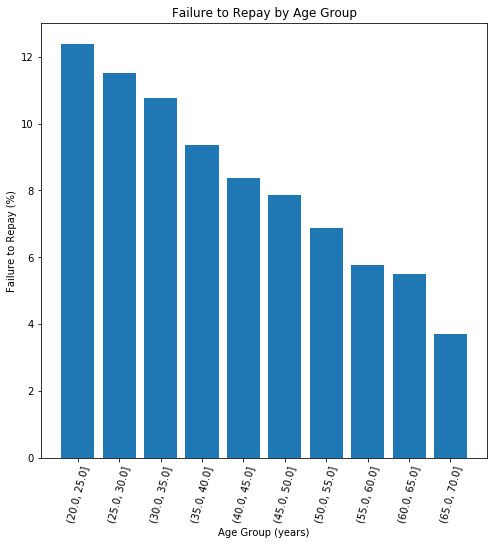

In [138]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [141]:
#selecting columns for correlation, removing cols for floor and house ec

cols=['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [143]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

EXT_SOURCE_1  EXT_SOURCE_3  EXT_SOURCE_2  \
EXT_SOURCE_1                        1.000         0.142         0.163   
EXT_SOURCE_3                        0.142         1.000         0.078   
EXT_SOURCE_2                        0.163         0.078         1.000   
AMT_GOODS_PRICE                     0.154         0.065         0.086   
AMT_ANNUITY                         0.056         0.011         0.057   
CNT_FAM_MEMBERS                    -0.056        -0.022        -0.004   
DAYS_LAST_PHONE_CHANGE             -0.133        -0.067        -0.203   
AMT_CREDIT                          0.146         0.063         0.073   
AMT_INCOME_TOTAL                    0.038        -0.077         0.116   
DAYS_REGISTRATION                  -0.163        -0.089        -0.065   
REGION_POPULATION_RELATIVE          0.074        -0.005         0.154   
CNT_CHILDREN                       -0.089        -0.021        -0.014   
HOUR_APPR_PROCESS_START             0.009        -0.044         0.132   
REGION_RATING_CLIENT_W_CITY        -0.053        -0.003        -0.234   
REGION_RATING_CLIENT               -0.058        -0.001        -0.236   
DAYS_ID_PUBLISH                    -0.127        -0.129        -0.062   
DAYS_EMPLOYED                      -0.227        -0.088        -0.093   
DAYS_BIRTH                         -0.584        -0.177        -0.103   

                             AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  \
EXT_SOURCE_1                           0.154        0.056           -0.056   
EXT_SOURCE_3                           0.065        0.011           -0.022   
EXT_SOURCE_2                           0.086        0.057           -0.004   
AMT_GOODS_PRICE                        1.000        0.718            0.036   
AMT_ANNUITY                            0.718        1.000            0.072   
CNT_FAM_MEMBERS                        0.036        0.072            1.000   
DAYS_LAST_PHONE_CHANGE                -0.106       -0.060           -0.008   
AMT_CREDIT                             0.972        0.740            0.041   
AMT_INCOME_TOTAL                       0.233        0.295           -0.004   
DAYS_REGISTRATION                     -0.044        0.030            0.147   
REGION_POPULATION_RELATIVE             0.055        0.026           -0.031   
CNT_CHILDREN                          -0.009        0.037            0.881   
HOUR_APPR_PROCESS_START                0.031        0.015           -0.028   
REGION_RATING_CLIENT_W_CITY           -0.042       -0.032            0.052   
REGION_RATING_CLIENT                  -0.038       -0.024            0.045   
DAYS_ID_PUBLISH                       -0.057       -0.011           -0.023   
DAYS_EMPLOYED                         -0.114       -0.041           -0.001   
DAYS_BIRTH                            -0.139       -0.002            0.213   

                             DAYS_LAST_PHONE_CHANGE  AMT_CREDIT  \
EXT_SOURCE_1                                 -0.133       0.146   
EXT_SOURCE_3                                 -0.067       0.063   
EXT_SOURCE_2                                 -0.203       0.073   
AMT_GOODS_PRICE                              -0.106       0.972   
AMT_ANNUITY                                  -0.060       0.740   
CNT_FAM_MEMBERS                              -0.008       0.041   
DAYS_LAST_PHONE_CHANGE                        1.000      -0.093   
AMT_CREDIT                                   -0.093       1.000   
AMT_INCOME_TOTAL                             -0.075       0.236   
DAYS_REGISTRATION                             0.076      -0.043   
REGION_POPULATION_RELATIVE                   -0.053       0.046   
CNT_CHILDREN                                  0.013      -0.001   
HOUR_APPR_PROCESS_START                      -0.018       0.016   
REGION_RATING_CLIENT_W_CITY                   0.018      -0.034   
REGION_RATING_CLIENT                          0.017      -0.028   
DAYS_ID_PUBLISH                               0.132      -0.054   
DAYS_EMPLOYED      

In [145]:
defaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [146]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH                   DAYS_BIRTH              1.000000
AMT_CREDIT                   AMT_GOODS_PRICE         0.972369
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.963537
CNT_FAM_MEMBERS              CNT_CHILDREN            0.881358
AMT_ANNUITY                  AMT_CREDIT              0.739558
                             AMT_GOODS_PRICE         0.718346
DAYS_BIRTH                   DAYS_EMPLOYED           0.310256
                             DAYS_REGISTRATION       0.295323
AMT_INCOME_TOTAL             AMT_ANNUITY             0.295111
DAYS_ID_PUBLISH              DAYS_BIRTH              0.273770
dtype: float64

In [148]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_3                 DAYS_BIRTH                    -0.177079
DAYS_LAST_PHONE_CHANGE       EXT_SOURCE_2                  -0.202996
EXT_SOURCE_1                 DAYS_EMPLOYED                 -0.227277
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.233878
                             REGION_RATING_CLIENT          -0.235819
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START       -0.277852
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT          -0.292989
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.404156
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.407694
EXT_SOURCE_1                 DAYS_BIRTH                    -0.584132
dtype: float64

In [149]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [152]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

EXT_SOURCE_1  EXT_SOURCE_3  EXT_SOURCE_2  \
EXT_SOURCE_1                        1.000         0.173         0.186   
EXT_SOURCE_3                        0.173         1.000         0.083   
EXT_SOURCE_2                        0.186         0.083         1.000   
AMT_GOODS_PRICE                     0.126         0.006         0.083   
AMT_ANNUITY                         0.056        -0.010         0.068   
CNT_FAM_MEMBERS                    -0.100        -0.031        -0.003   
DAYS_LAST_PHONE_CHANGE             -0.130        -0.071        -0.187   
AMT_CREDIT                          0.119         0.005         0.074   
AMT_INCOME_TOTAL                    0.039        -0.108         0.139   
DAYS_REGISTRATION                  -0.188        -0.106        -0.051   
REGION_POPULATION_RELATIVE          0.071        -0.009         0.173   
CNT_CHILDREN                       -0.139        -0.044        -0.015   
HOUR_APPR_PROCESS_START             0.014        -0.045         0.150   
REGION_RATING_CLIENT_W_CITY        -0.085        -0.007        -0.265   
REGION_RATING_CLIENT               -0.086        -0.008        -0.269   
DAYS_ID_PUBLISH                    -0.147        -0.133        -0.045   
DAYS_EMPLOYED                      -0.253        -0.120        -0.081   
DAYS_BIRTH                         -0.615        -0.206        -0.078   

                             AMT_GOODS_PRICE  AMT_ANNUITY  CNT_FAM_MEMBERS  \
EXT_SOURCE_1                           0.126        0.056           -0.100   
EXT_SOURCE_3                           0.006       -0.010           -0.031   
EXT_SOURCE_2                           0.083        0.068           -0.003   
AMT_GOODS_PRICE                        1.000        0.746            0.045   
AMT_ANNUITY                            0.746        1.000            0.064   
CNT_FAM_MEMBERS                        0.045        0.064            1.000   
DAYS_LAST_PHONE_CHANGE                -0.073       -0.062           -0.030   
AMT_CREDIT                             0.978        0.760            0.045   
AMT_INCOME_TOTAL                       0.261        0.324            0.031   
DAYS_REGISTRATION                      0.002        0.030            0.181   
REGION_POPULATION_RELATIVE             0.038        0.043           -0.026   
CNT_CHILDREN                          -0.005        0.020            0.874   
HOUR_APPR_PROCESS_START                0.046        0.030           -0.009   
REGION_RATING_CLIENT_W_CITY           -0.034       -0.063            0.032   
REGION_RATING_CLIENT                  -0.032       -0.056            0.031   
DAYS_ID_PUBLISH                       -0.007        0.014           -0.014   
DAYS_EMPLOYED                         -0.081       -0.041            0.029   
DAYS_BIRTH                            -0.046        0.017            0.290   

                             DAYS_LAST_PHONE_CHANGE  AMT_CREDIT  \
EXT_SOURCE_1                                 -0.130       0.119   
EXT_SOURCE_3                                 -0.071       0.005   
EXT_SOURCE_2                                 -0.187       0.074   
AMT_GOODS_PRICE                              -0.073       0.978   
AMT_ANNUITY                                  -0.062       0.760   
CNT_FAM_MEMBERS                              -0.030       0.045   
DAYS_LAST_PHONE_CHANGE                        1.000      -0.069   
AMT_CREDIT                                   -0.069       1.000   
AMT_INCOME_TOTAL                             -0.055       0.259   
DAYS_REGISTRATION                             0.051      -0.002   
REGION_POPULATION_RELATIVE                   -0.036       0.031   
CNT_CHILDREN                                 -0.010      -0.002   
HOUR_APPR_PROCESS_START                      -0.012       0.034   
REGION_RATING_CLIENT_W_CITY                   0.018      -0.033   
REGION_RATING_CLIENT                          0.018      -0.030   
DAYS_ID_PUBLISH                               0.089      -0.005   
DAYS_EMPLOYED      

In [154]:
nondefaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [156]:
c2=nondefaulters_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH            DAYS_BIRTH                     1.000000
AMT_CREDIT            AMT_GOODS_PRICE                0.978008
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.953441
CNT_FAM_MEMBERS       CNT_CHILDREN                   0.874001
AMT_CREDIT            AMT_ANNUITY                    0.759817
AMT_GOODS_PRICE       AMT_ANNUITY                    0.746023
DAYS_EMPLOYED         DAYS_BIRTH                     0.357011
DAYS_BIRTH            CNT_CHILDREN                   0.340359
                      DAYS_REGISTRATION              0.339888
AMT_ANNUITY           AMT_INCOME_TOTAL               0.324297
dtype: float64

In [157]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_INCOME_TOTAL             REGION_RATING_CLIENT_W_CITY   -0.197442
EXT_SOURCE_3                 DAYS_BIRTH                    -0.206138
DAYS_EMPLOYED                EXT_SOURCE_1                  -0.253095
REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START       -0.254896
                             EXT_SOURCE_2                  -0.264788
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.268525
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT          -0.274802
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.488026
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.488273
DAYS_BIRTH                   EXT_SOURCE_1                  -0.615356
dtype: float64

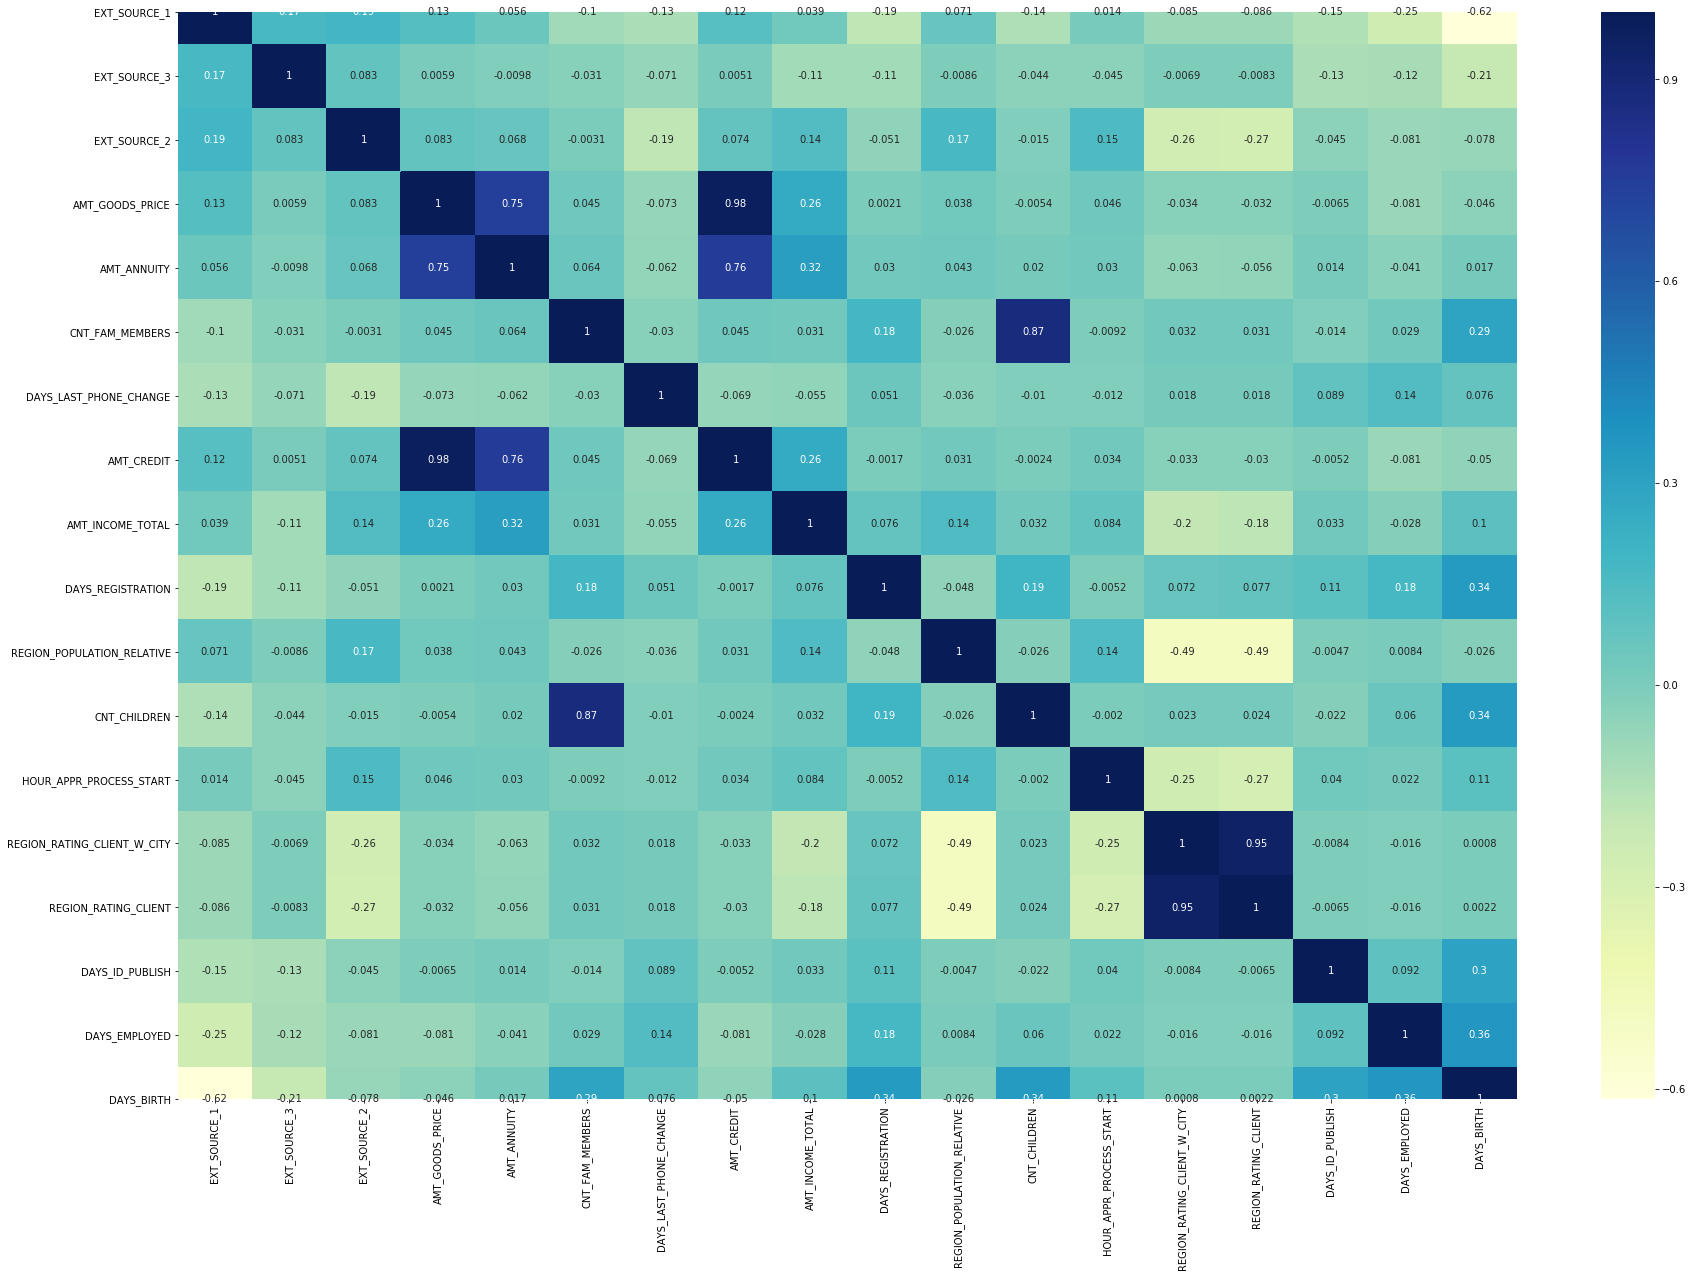

In [159]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [161]:
#### Analysis of Previous Application Dataset
previous_data = pd.read_csv('C:\\Users\\pabitra.guchhait\\GSK\\EDAcaseStudy\\CSV\\previous_application.csv')
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [163]:
previous_data.shape

(1670214, 37)

In [165]:
application_data.dtypes.value_counts()

object     47
float64    46
int64       8
dtype: int64

In [167]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [168]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [170]:
previous_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [172]:
sns.countplot(previous_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [173]:
###Identifying missing values and filtering out columns with high missing values

In [174]:
prev_meta_data=meta_data(previous_data)
prev_meta_data.reset_index(drop=False).head(20)

index    Total    Percent  Unique Data_Type
0    RATE_INTEREST_PRIVILEGED  1664263  99.643698      25   float64
1       RATE_INTEREST_PRIMARY  1664263  99.643698     148   float64
2            AMT_DOWN_PAYMENT   895844  53.636480   29278   float64
3           RATE_DOWN_PAYMENT   895844  53.636480  207033   float64
4             NAME_TYPE_SUITE   820405  49.119754       7    object
5   NFLAG_INSURED_ON_APPROVAL   673065  40.298129       2   float64
6            DAYS_TERMINATION   673065  40.298129    2830   float64
7               DAYS_LAST_DUE   673065  40.298129    2873   float64
8   DAYS_LAST_DUE_1ST_VERSION   673065  40.298129    4605   float64
9              DAYS_FIRST_DUE   673065  40.298129    2892   float64
10         DAYS_FIRST_DRAWING   673065  40.298129    2838   float64
11            AMT_GOODS_PRICE   385515  23.081773   93885   float64
12                AMT_ANNUITY   372235  22.286665  357959   float64
13                CNT_PAYMENT   372230  22.286366      49   float64
14        PRODUCT_COMBINATION      346   0.020716      17    object
15                 AMT_CREDIT        1   0.000060   86803   float64
16           NAME_YIELD_GROUP        0   0.000000       5    object
17             NAME_PORTFOLIO        0   0.000000       5    object
18       NAME_SELLER_INDUSTRY        0   0.000000      11    object
19           SELLERPLACE_AREA        0   0.000000    2097     int64

In [176]:
#dropping columns with more than 55% missing values 
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<55)].index)
previous_data=previous_data[cols_to_keep]
previous_data.describe()

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  NFLAG_INSURED_ON_APPROVAL  \
count      7.743700e+05      774370.000000              997149.000000   
mean       6.697402e+03           0.079637                   0.332570   
std        2.092150e+04           0.107823                   0.471134   
min       -9.000000e-01          -0.000015                   0.000000   
25%        0.000000e+00           0.000000                   0.000000   
50%        1.638000e+03           0.051605                   0.000000   
75%        7.740000e+03           0.108909                   1.000000   
max        3.060045e+06           1.000000                   1.000000   

       DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count     997149.000000  997149.000000              997149.000000   
mean       81992.343838   76582.403064               33767.774054   
std       153303.516729  149647.415123              106857.034789   
min        -2874.000000   -2889.000000               -2801.000000   
25%        -1270.000000   -1314.000000               -1242.000000   
50%         -499.000000    -537.000000                -361.000000   
75%          -44.000000     -74.000000                 129.000000   
max       365243.000000  365243.000000              365243.000000   

       DAYS_FIRST_DUE  DAYS_FIRST_DRAWING  AMT_GOODS_PRICE   AMT_ANNUITY  \
count   997149.000000       997149.000000     1.284699e+06  1.297979e+06   
mean     13826.269337       342209.855039     2.278473e+05  1.595512e+04   
std      72444.869708        88916.115834     3.153966e+05  1.478214e+04   
min      -2892.000000        -2922.000000     0.000000e+00  0.000000e+00   
25%      -1628.000000       365243.000000     5.084100e+04  6.321780e+03   
50%       -831.000000       365243.000000     1.123200e+05  1.125000e+04   
75%       -411.000000       365243.000000     2.340000e+05  2.065842e+04   
max     365243.000000       365243.000000     6.905160e+06  4.180581e+05   

        CNT_PAYMENT    AMT_CREDIT  SELLERPLACE_AREA    SK_ID_PREV  \
count  1.297984e+06  1.670213e+06      1.670214e+06  1.670214e+06   
mean   1.605408e+01  1.961140e+05      3.139511e+02  1.923089e+06   
std    1.456729e+01  3.185746e+05      7.127443e+03  5.325980e+05   
min    0.000000e+00  0.000000e+00     -1.000000e+00  1.000001e+06   
25%    6.000000e+00  2.416050e+04     -1.000000e+00  1.461857e+06   
50%    1.200000e+01  8.054100e+04      3.000000e+00  1.923110e+06   
75%    2.400000e+01  2.164185e+05      8.200000e+01  2.384280e+06   
max    8.400000e+01  6.905160e+06      4.000000e+06  2.845382e+06   

         SK_ID_CURR  DAYS_DECISION  NFLAG_LAST_APPL_IN_DAY  \
count  1.670214e+06   1.670214e+06            1.670214e+06   
mean   2.783572e+05  -8.806797e+02            9.964675e-01   
std    1.028148e+05   7.790997e+02            5.932963e-02   
min    1.000010e+05  -2.922000e+03            0.000000e+00   
25%    1.893290e+05  -1.300000e+03            1.000000e+00   
50%    2.787145e+05  -5.810000e+02            1.000000e+00   
75%    3.675140e+05  -2.800000e+02            1.000000e+00   
max    4.562550e+05  -1.000000e+00            1.000000e+00   

       HOUR_APPR_PROCESS_START  AMT_APPLICATION  
count             1.670214e+06     1.670214e+06  
mean              1.248418e+01     1.752339e+05  
std               3.334028e+00     2.927798e+05  
min               0.000000e+00     0.000000e+00  
25%               1.000000e+01     1.872000e+04  
50%               1.200000e+01     7.104600e+04  
75%               1.500000e+01     1.803600e+05  
max               2.300000e+01     6.905160e+06

In [178]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(prev_meta_data[(prev_meta_data.Percent>0)&(prev_meta_data.Percent<15)])
low_missing

Total   Percent  Unique Data_Type
PRODUCT_COMBINATION    346  0.020716      17    object
AMT_CREDIT               1  0.000060   86803   float64

In [179]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']

In [181]:
def convert_data(previous_data, cols_to_convert):
    for y in cols_to_convert:
        previous_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return previous_data
convert_data(previous_data, cols_to_convert)
previous_data.dtypes.value_counts()

object     18
float64    12
int64       5
dtype: int64

In [183]:
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']
unused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [184]:
percentage_approved=(len(approved)*100)/len(previous_data)
percentage_refused=(len(refused)*100)/len(previous_data)
percentage_canceled=(len(canceled)*100)/len(previous_data)
percentage_unused=(len(unused)*100)/len(previous_data)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 62.07 %
The Percentage of people whose loans have been Refused is: 17.4 %
The Percentage of people whose loans have been Canceled is: 18.94 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [186]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [188]:
previous_data.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'PRODUCT_COMBINATION',
       'NAME_YIELD_GROUP', 'NAME_PORTFOLIO', 'NAME_SELLER_INDUSTRY',
       'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS',
       'NAME_CASH_LOAN_PURPOSE', 'NFLAG_LAST_APPL_IN_DAY',
       'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE'],
      dtype='object')

In [189]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

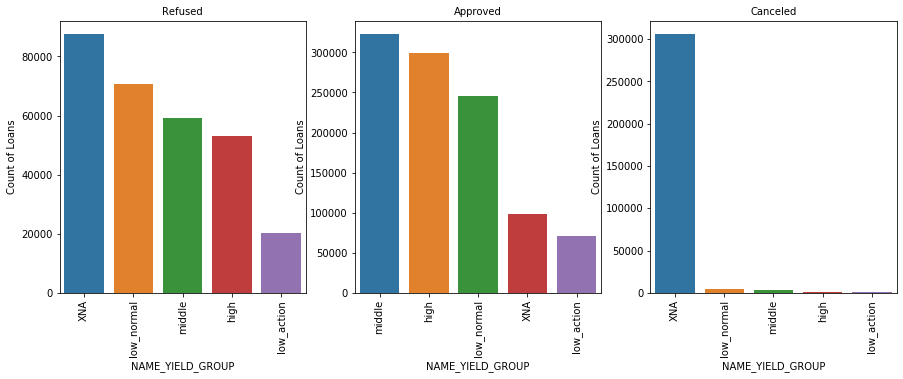

In [191]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

In [192]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

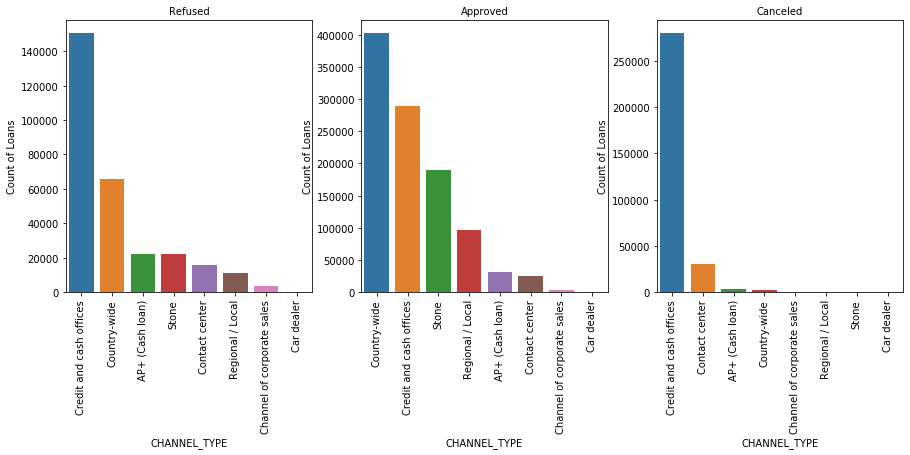

In [194]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

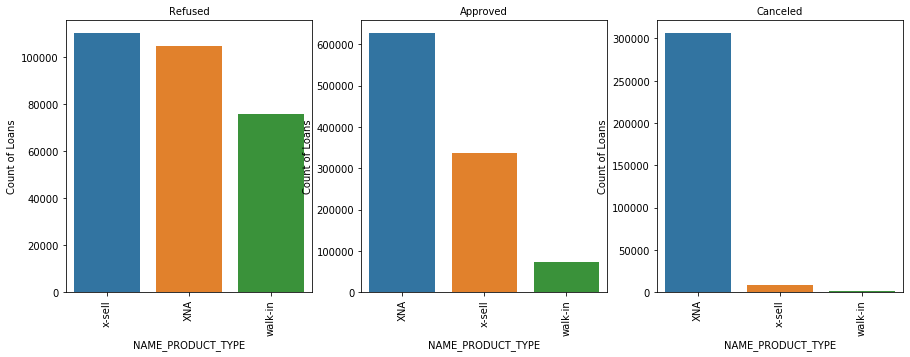

In [195]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

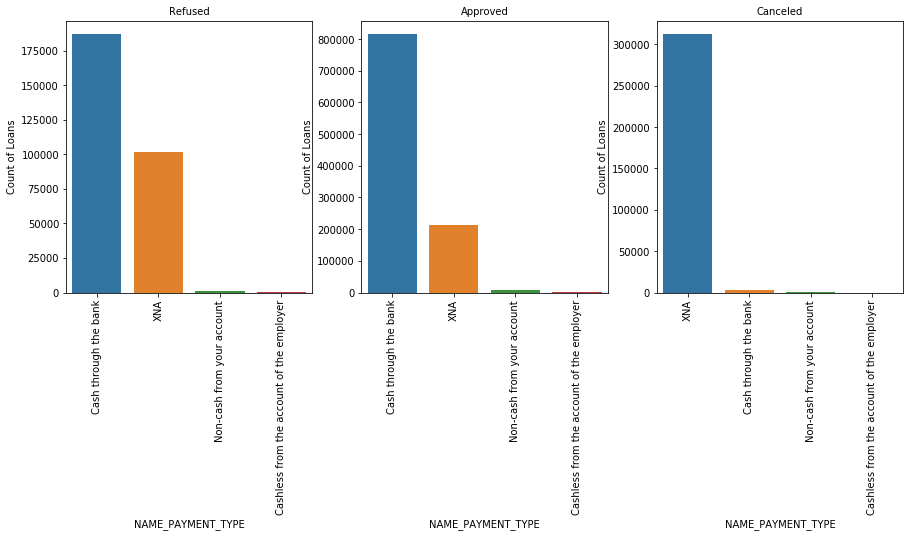

In [196]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

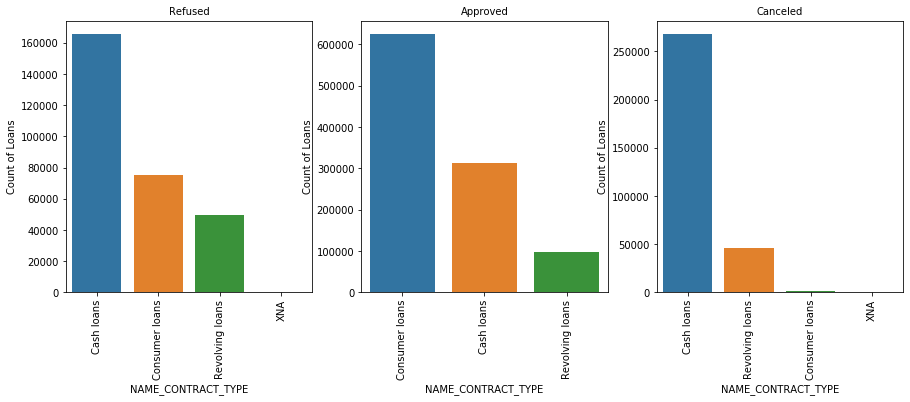

In [197]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

In [198]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

In [199]:
sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=previous_data)

In [200]:
### Removing Outliers
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'AMT_ANNUITY')

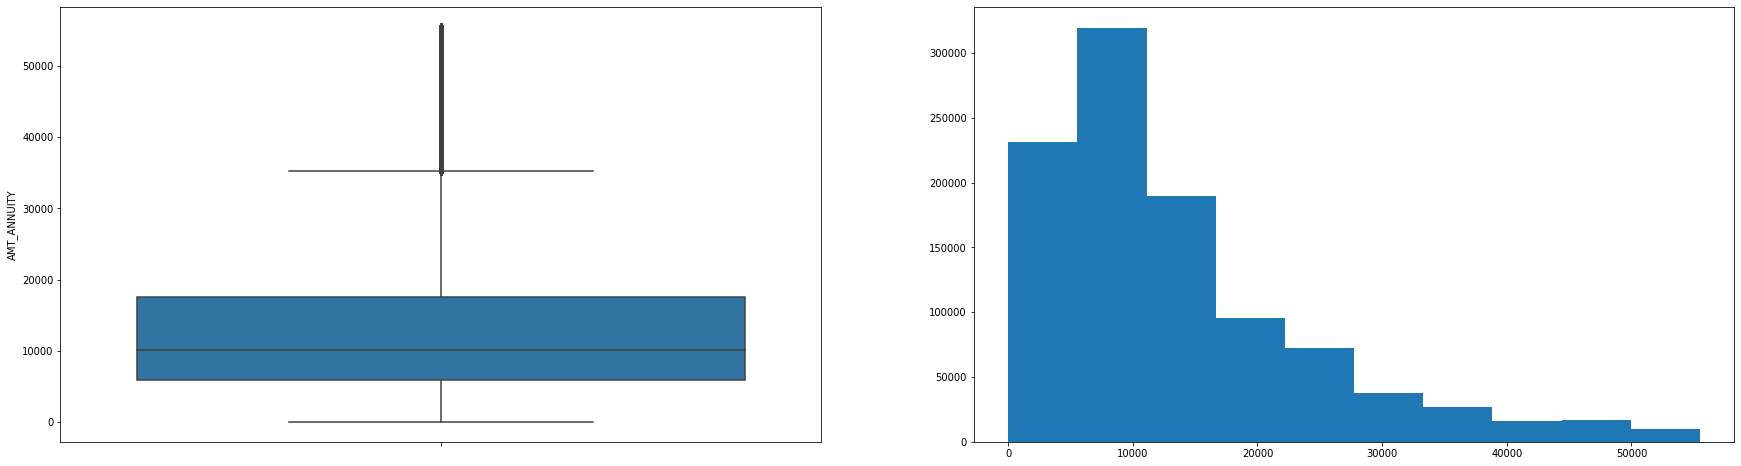

In [202]:
approved=approved[approved.AMT_ANNUITY<np.nanpercentile(approved['AMT_ANNUITY'], 99)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_ANNUITY boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
ax.set_title('AMT_ANNUITY')

C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


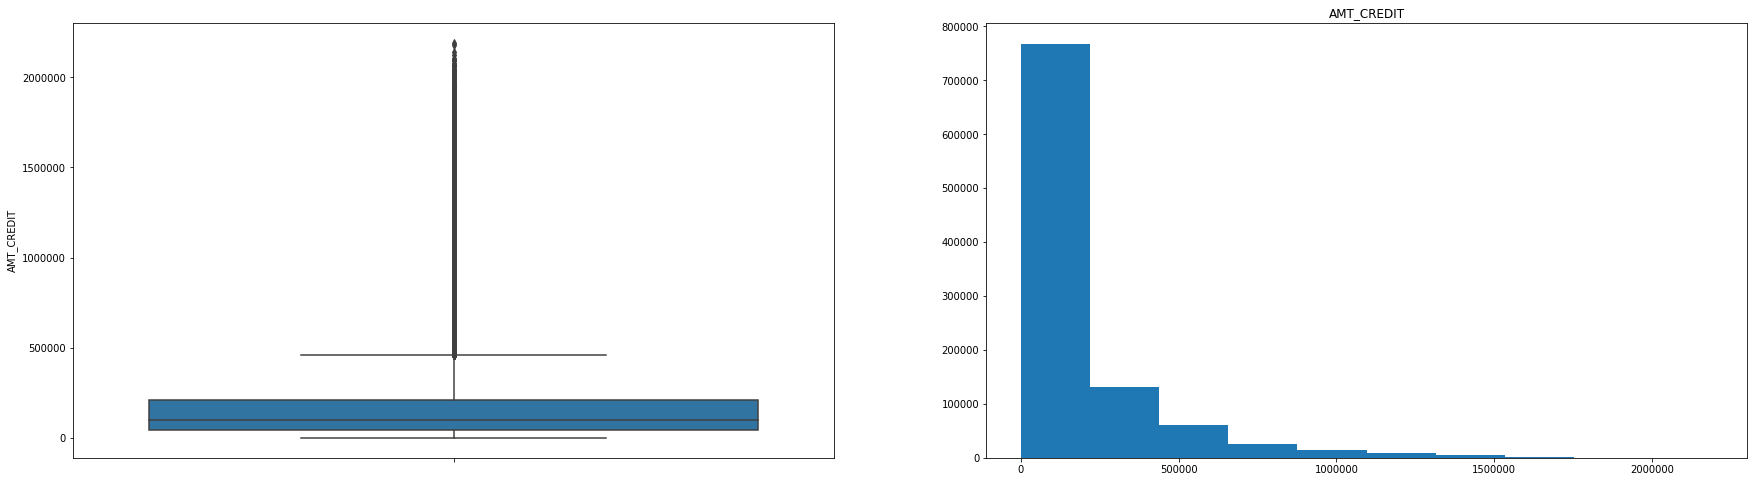

In [203]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

Text(0.5, 1.0, 'AMT_CREDIT')

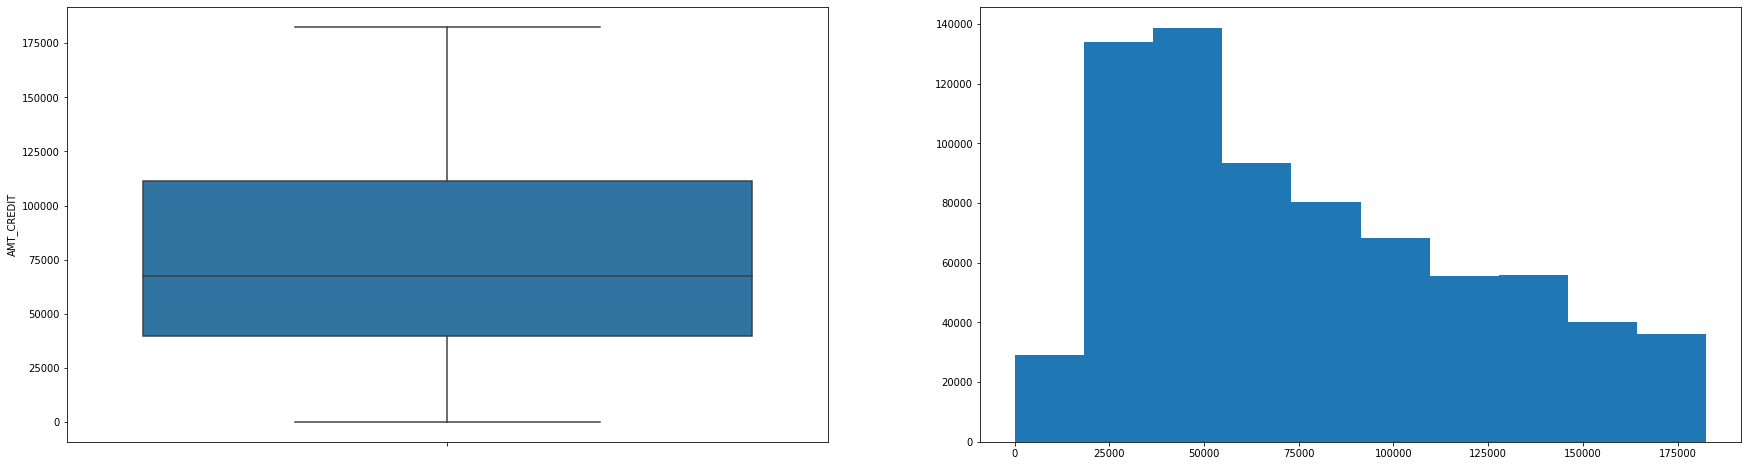

In [206]:
approved=approved[approved.AMT_CREDIT<np.nanpercentile(approved['AMT_CREDIT'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_CREDIT boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
ax.set_title('AMT_CREDIT')

C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\pabitra.guchhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


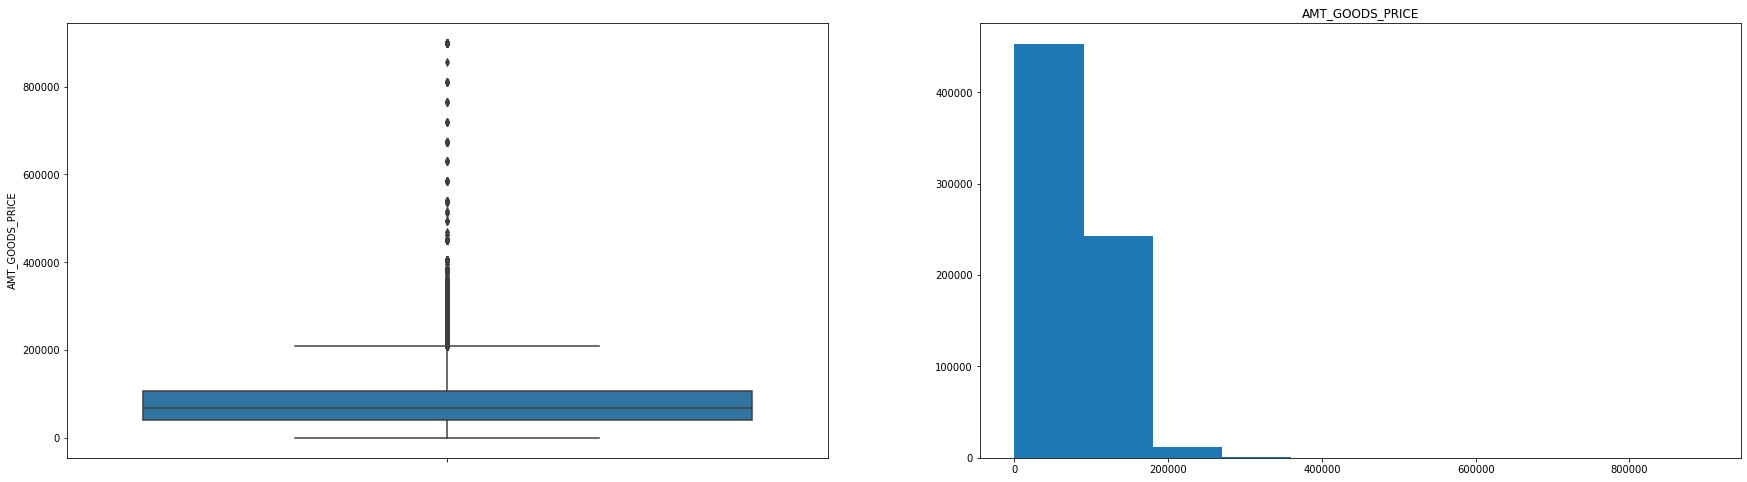

In [207]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

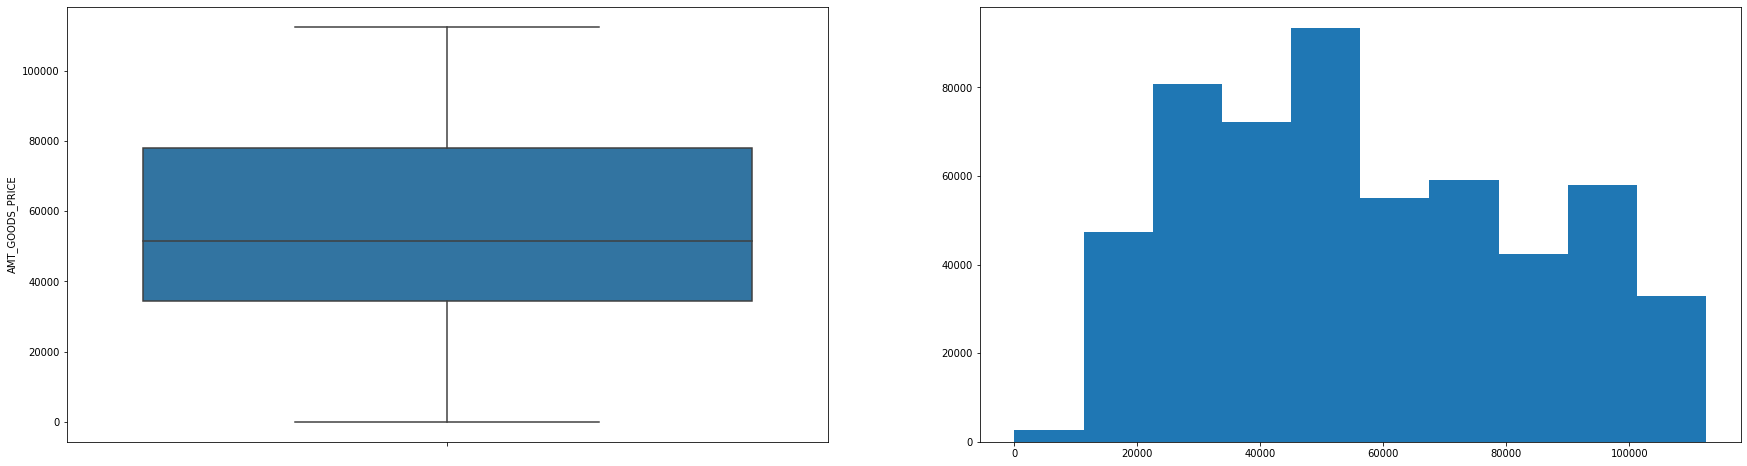

In [209]:
approved=approved[approved.AMT_GOODS_PRICE<np.nanpercentile(approved['AMT_GOODS_PRICE'], 90)]
fig, ax = plt.subplots(figsize = (30, 8))
ax.set_title('AMT_GOODS_PRICE boxplot on data within 99 percentile');
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
ax.set_title('AMT_GOODS_PRICE')

In [211]:
### Bivariate Analysis
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [214]:
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [216]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  \
AMT_DOWN_PAYMENT                      1.000              0.855   
RATE_DOWN_PAYMENT                     0.855              1.000   
DAYS_TERMINATION                     -0.099             -0.148   
DAYS_LAST_DUE                        -0.102             -0.150   
DAYS_LAST_DUE_1ST_VERSION             0.009             -0.003   
DAYS_FIRST_DUE                       -0.036             -0.049   
DAYS_FIRST_DRAWING                   -0.022             -0.019   
AMT_GOODS_PRICE                       0.250             -0.092   
AMT_ANNUITY                           0.139             -0.118   
CNT_PAYMENT                          -0.164             -0.268   
AMT_CREDIT                           -0.013             -0.327   
DAYS_DECISION                        -0.108             -0.223   
AMT_APPLICATION                       0.250             -0.092   

                           DAYS_TERMINATION  DAYS_LAST_DUE  \
AMT_DOWN_PAYMENT                     -0.099         -0.102   
RATE_DOWN_PAYMENT                    -0.148         -0.150   
DAYS_TERMINATION                      1.000          0.961   
DAYS_LAST_DUE                         0.961          1.000   
DAYS_LAST_DUE_1ST_VERSION             0.517          0.526   
DAYS_FIRST_DUE                        0.450          0.500   
DAYS_FIRST_DRAWING                   -0.364         -0.329   
AMT_GOODS_PRICE                       0.058          0.057   
AMT_ANNUITY                          -0.128         -0.133   
CNT_PAYMENT                          -0.097         -0.099   
AMT_CREDIT                            0.097          0.095   
DAYS_DECISION                         0.471          0.474   
AMT_APPLICATION                       0.058          0.057   

                           DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DUE  \
AMT_DOWN_PAYMENT                               0.009          -0.036   
RATE_DOWN_PAYMENT                             -0.003          -0.049   
DAYS_TERMINATION                               0.517           0.450   
DAYS_LAST_DUE                                  0.526           0.500   
DAYS_LAST_DUE_1ST_VERSION                      1.000           0.615   
DAYS_FIRST_DUE                                 0.615           1.000   
DAYS_FIRST_DRAWING                            -0.706          -0.055   
AMT_GOODS_PRICE                               -0.078          -0.057   
AMT_ANNUITY                                   -0.266          -0.163   
CNT_PAYMENT                                   -0.427          -0.263   
AMT_CREDIT                                    -0.042          -0.034   
DAYS_DECISION                                  0.250           0.246   
AMT_APPLICATION                               -0.078          -0.057   

                           DAYS_FIRST_DRAWING  AMT_GOODS_PRICE  AMT_ANNUITY  \
AMT_DOWN_PAYMENT                       -0.022            0.250        0.139   
RATE_DOWN_PAYMENT                      -0.019           -0.092       -0.118   
DAYS_TERMINATION                       -0.364            0.058       -0.128   
DAYS_LAST_DUE                          -0.329            0.057       -0.133   
DAYS_LAST_DUE_1ST_VERSION              -0.706           -0.078       -0.266   
DAYS_FIRST_DUE                         -0.055           -0.057       -0.163   
DAYS_FIRST_DRAWING                      1.000            0.056        0.188   
AMT_GOODS_PRICE                         0.056            1.000        0.691   
AMT_ANNUITY                             0.188            0.691        1.000   
CNT_PAYMENT                             0.304            0.312       -0.130   
AMT_CREDIT                              0.030            0.939        0.660   
DAYS_DECISION                          -0.161            0.221        0.136   
AMT_APPLICATION                         0.056            1.000        0.691   

                           CNT_PAYMENT  AMT_CREDIT  DAYS_DECISION  \
AMT_DOWN_PAYMENT                -0.164      -0.0

In [217]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION            AMT_APPLICATION              1.000000
DAYS_LAST_DUE              DAYS_TERMINATION             0.961064
AMT_APPLICATION            AMT_CREDIT                   0.938731
RATE_DOWN_PAYMENT          AMT_DOWN_PAYMENT             0.855402
AMT_APPLICATION            AMT_ANNUITY                  0.691172
AMT_ANNUITY                AMT_CREDIT                   0.659769
DAYS_FIRST_DUE             DAYS_LAST_DUE_1ST_VERSION    0.614910
DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE                0.526353
                           DAYS_TERMINATION             0.516519
DAYS_FIRST_DUE             DAYS_LAST_DUE                0.499945
dtype: float64

In [218]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

CNT_PAYMENT                AMT_DOWN_PAYMENT     -0.163916
RATE_DOWN_PAYMENT          DAYS_DECISION        -0.223401
CNT_PAYMENT                DAYS_FIRST_DUE       -0.263214
DAYS_LAST_DUE_1ST_VERSION  AMT_ANNUITY          -0.265574
CNT_PAYMENT                RATE_DOWN_PAYMENT    -0.268191
RATE_DOWN_PAYMENT          AMT_CREDIT           -0.327079
DAYS_FIRST_DRAWING         DAYS_LAST_DUE        -0.328742
DAYS_TERMINATION           DAYS_FIRST_DRAWING   -0.364445
DAYS_LAST_DUE_1ST_VERSION  CNT_PAYMENT          -0.427312
                           DAYS_FIRST_DRAWING   -0.705545
dtype: float64

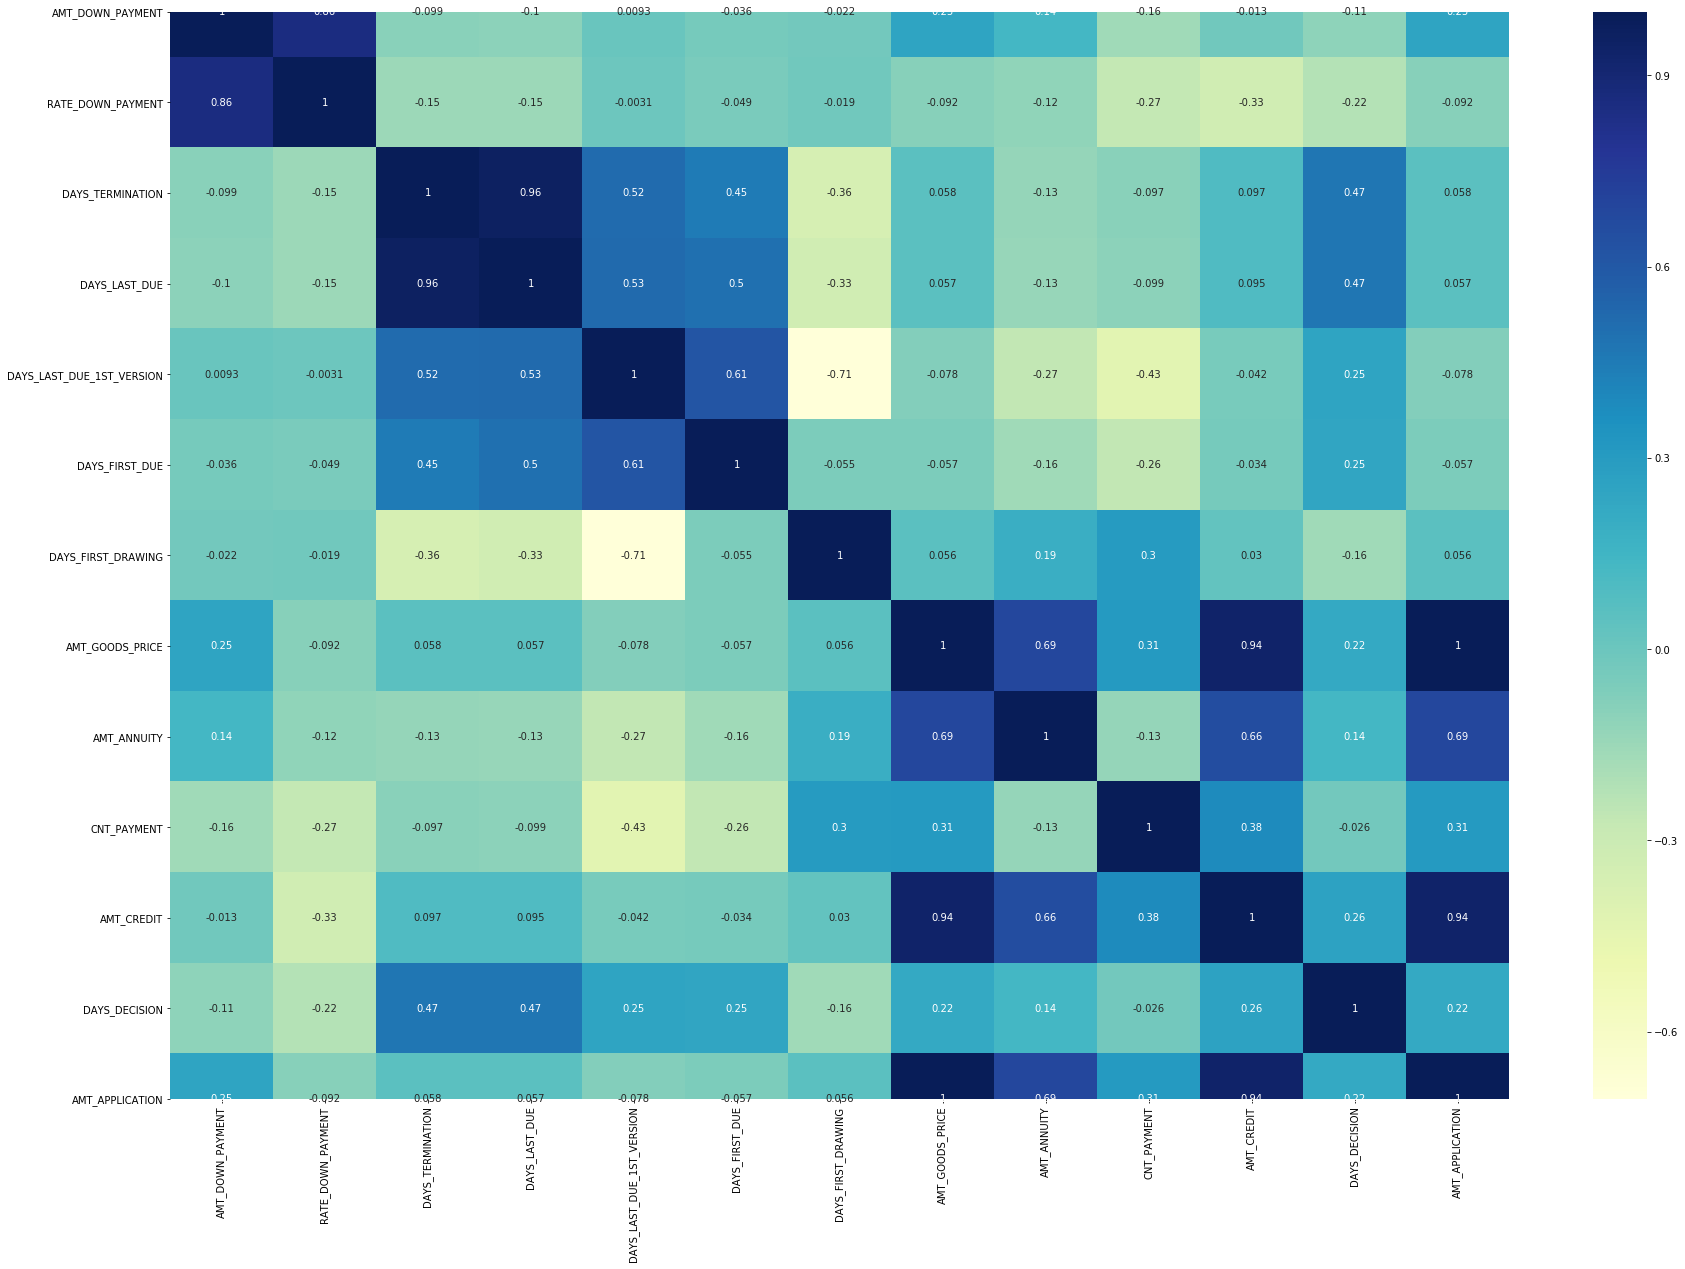

In [220]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [221]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

AMT_DOWN_PAYMENT  RATE_DOWN_PAYMENT  AMT_GOODS_PRICE  \
AMT_DOWN_PAYMENT              1.000              0.416            0.536   
RATE_DOWN_PAYMENT             0.416              1.000           -0.024   
AMT_GOODS_PRICE               0.536             -0.024            1.000   
AMT_ANNUITY                   0.317             -0.084            0.823   
CNT_PAYMENT                   0.095             -0.242            0.658   
AMT_CREDIT                    0.386             -0.112            0.992   
DAYS_DECISION                 0.008             -0.225            0.334   
AMT_APPLICATION               0.536             -0.024            1.000   

                   AMT_ANNUITY  CNT_PAYMENT  AMT_CREDIT  DAYS_DECISION  \
AMT_DOWN_PAYMENT         0.317        0.095       0.386          0.008   
RATE_DOWN_PAYMENT       -0.084       -0.242      -0.112         -0.225   
AMT_GOODS_PRICE          0.823        0.658       0.992          0.334   
AMT_ANNUITY              1.000        0.427       0.820          0.287   
CNT_PAYMENT              0.427        1.000       0.677          0.306   
AMT_CREDIT               0.820        0.677       1.000          0.270   
DAYS_DECISION            0.287        0.306       0.270          1.000   
AMT_APPLICATION          0.818        0.670       0.984          0.265   

                   AMT_APPLICATION  
AMT_DOWN_PAYMENT             0.536  
RATE_DOWN_PAYMENT           -0.024  
AMT_GOODS_PRICE              1.000  
AMT_ANNUITY                  0.818  
CNT_PAYMENT                  0.670  
AMT_CREDIT                   0.984  
DAYS_DECISION                0.265  
AMT_APPLICATION              1.000

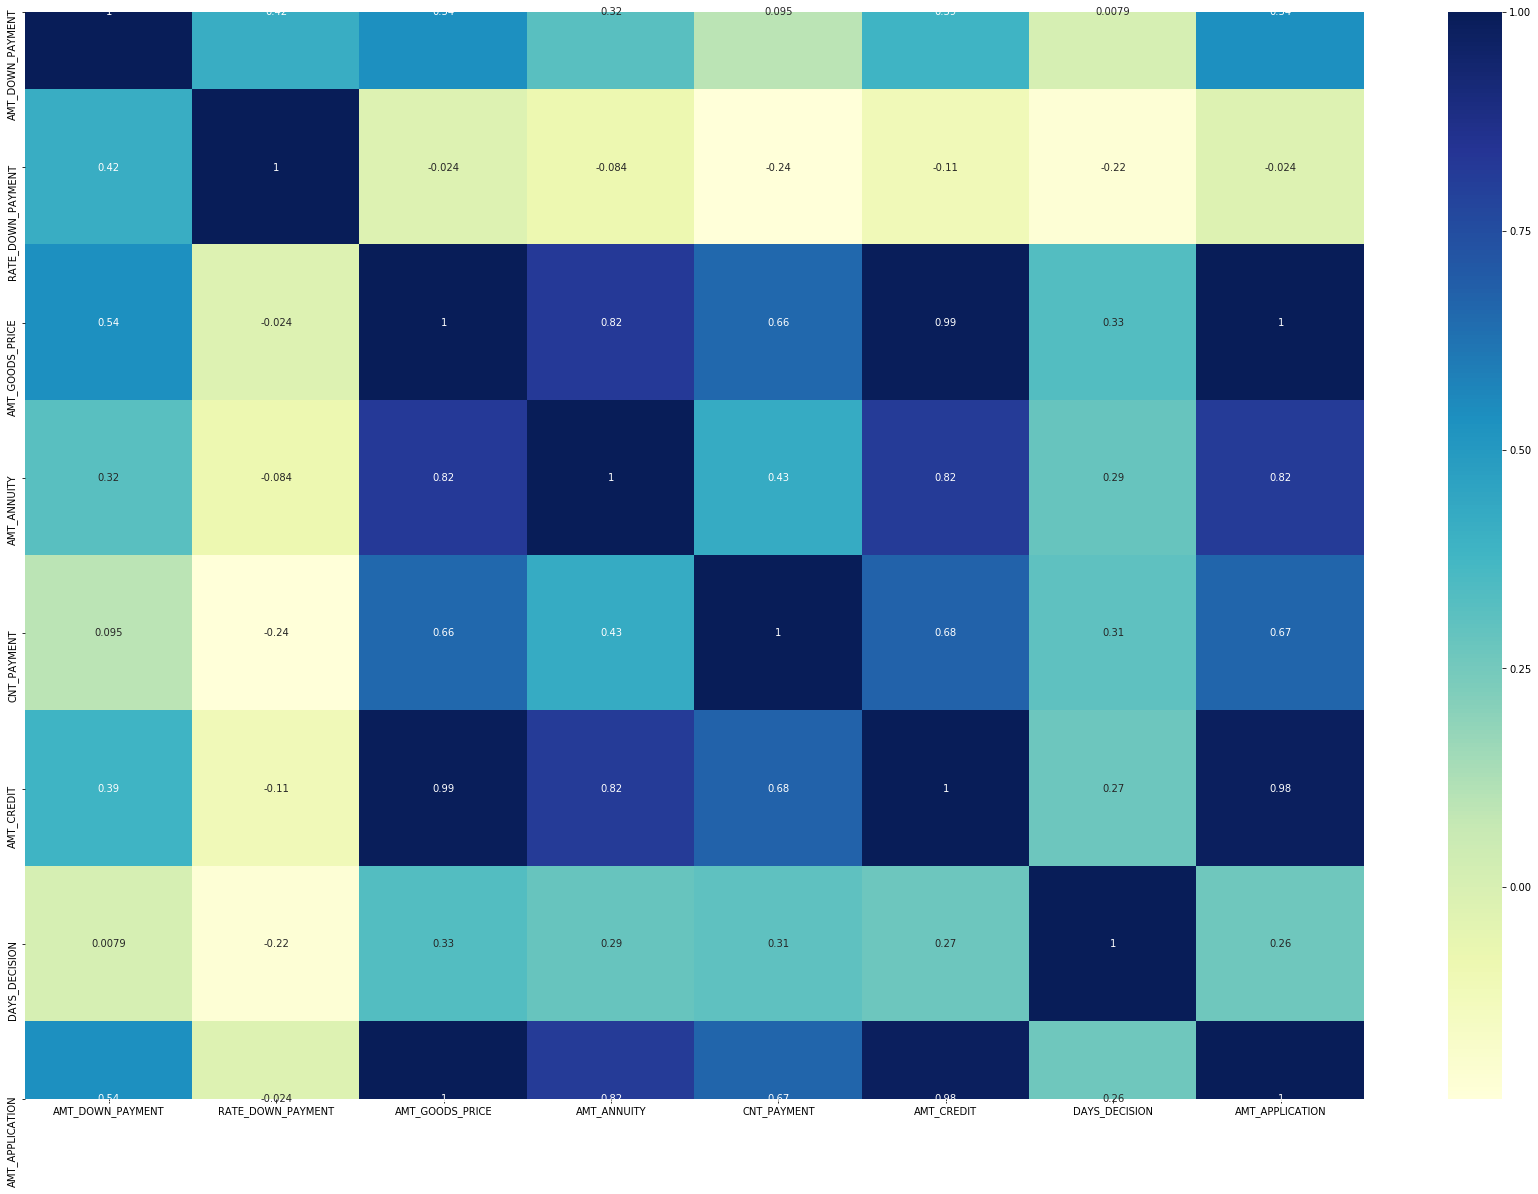

In [223]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [225]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION  AMT_APPLICATION    1.000000
AMT_GOODS_PRICE  AMT_APPLICATION    0.999699
                 AMT_CREDIT         0.991777
AMT_APPLICATION  AMT_CREDIT         0.983785
AMT_GOODS_PRICE  AMT_ANNUITY        0.822538
AMT_CREDIT       AMT_ANNUITY        0.819867
AMT_APPLICATION  AMT_ANNUITY        0.817869
AMT_CREDIT       CNT_PAYMENT        0.677433
AMT_APPLICATION  CNT_PAYMENT        0.669782
CNT_PAYMENT      AMT_GOODS_PRICE    0.658065
dtype: float64

In [226]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION      AMT_ANNUITY          0.286620
                   AMT_CREDIT           0.270099
                   AMT_APPLICATION      0.264581
AMT_DOWN_PAYMENT   CNT_PAYMENT          0.094697
DAYS_DECISION      AMT_DOWN_PAYMENT     0.007927
AMT_APPLICATION    RATE_DOWN_PAYMENT   -0.023624
AMT_ANNUITY        RATE_DOWN_PAYMENT   -0.084484
RATE_DOWN_PAYMENT  AMT_CREDIT          -0.111684
                   DAYS_DECISION       -0.224665
                   CNT_PAYMENT         -0.242238
dtype: float64

In [227]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'
    
approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated)

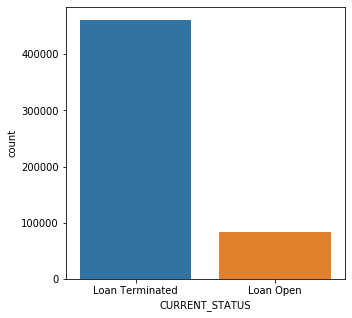

In [228]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

In [229]:
new_df= previous_data.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)

In [230]:
merged_df1=pd.merge(new_df, pd.DataFrame(application_data[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [231]:
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]

In [232]:
merged_df1.head()

SK_ID_CURR  Count of Refused Loans  TARGET
0      100002                       1       1
1      100003                       3       0
2      100004                       1       0
3      100006                       9       0
4      100007                       6       0

In [233]:
merged_df1[merged_df1['TARGET']==0].head()

SK_ID_CURR  Count of Refused Loans  TARGET
1      100003                       3       0
2      100004                       1       0
3      100006                       9       0
4      100007                       6       0
5      100008                       5       0